# Declaration of Originality

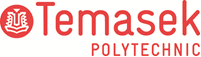

**TEMASEK POLYTECHNIC**
<br>**SCHOOL OF INFORMATICS & IT**
<br>**DIPLOMA IN INFORMATION TECHNOLOGY**
<br>**MACHINE LEARNING FOR DEVELOPERS (CAI2C08)**
<br>**AY2025/2026 OCTOBER SEMESTER**

**PROJECT PROGRAM CODES**
* Student Name (Matric Number)  : Chow Willy
* Tutorial Group                : PC07
* Tutor						    : Ester Goh
* Submission Date               : soon


**Declaration of Originality**
* I am the originator of this work and I have appropriately acknowledged all other original sources used as my references for this work.
* I understand that Plagiarism is the act of taking and using the whole or any part of another person’s work, including work generated by AI, and presenting it as my own.
* I understand that Plagiarism is an academic offence and if I am found to have committed or abetted the offence of plagiarism in relation to this submitted work, disciplinary action will be enforced.

# Libraries

In [1]:
## Import libraries

import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer

pd.set_option("display.max_columns", 200)


# 1. Business Understanding
Goal: Steam releases a large number of games every year, making it difficult for developers and publishers to anticipate which titles will gain strong player traction. Without a way to estimate popularity early, teams may misallocate marketing budgets, choose ineffective pricing, or release at suboptimal times.


# 2. Data Understanding

## 2.1 Load dataset

In [2]:
## Read *.csv file into pandas DataFrame
df = pd.read_csv("a_steam_data_2021_2025.csv")  # change path if needed

print("Dataset shape (rows, cols):", df.shape)
display(df.head())
print("\nColumns:", df.columns.tolist())    

Dataset shape (rows, cols): (65521, 10)


,appid,name,release_year,release_date,genres,categories,price,recommendations,developer,publisher
0,3057270,Seafarer's Gambit,2024,"Jul 5, 2024",Action;Adventure;Indie;RPG;Strategy,Single-player;Family Sharing,3.99,0,Bouncy Rocket Studios,Bouncy Rocket Studios
1,3822840,Capitalist Misadventures,2025,"Jul 25, 2025",Casual;Indie;Simulation;Strategy,Single-player;Save Anytime;Family Sharing,7.99,0,Caramelo Studios,Caramelo Studios
2,3216640,The Beast and the Princess,2025,"Jun 17, 2025",Adventure;Indie;Strategy,Single-player;Steam Achievements;Full controll...,12.99,0,Libragames,Libragames
3,2403620,Air Twister,2023,"Nov 10, 2023",Action;Adventure;Indie,Single-player;Steam Achievements;Full controll...,24.99,0,YS Net,ININ
4,1538040,Horde Slayer,2021,"Mar 19, 2021",Action;Adventure;Casual;Indie;RPG;Early Access,Single-player;Steam Achievements;Full controll...,3.99,0,Wagner Rodrigues,Wagner Rodrigues



Columns: ['appid', 'name', 'release_year', 'release_date', 'genres', 'categories', 'price', 'recommendations', 'developer', 'publisher']


## 2.2 Summary Statistics

In [3]:
## Understand the type of variable for each column
print("Data types:")
display(df.dtypes)

print("\nUnique values per column:")
display(df.nunique().sort_values(ascending=False))

Data types:


appid                int64
name                object
release_year         int64
release_date        object
genres              object
categories          object
price              float64
recommendations      int64
developer           object
publisher           object
dtype: object


Unique values per column:


appid              65521
name               65128
developer          45679
publisher          41600
categories          7993
recommendations     2536
release_date        1828
genres              1723
price                589
release_year           5
dtype: int64

In [4]:
## Check for missing data
missing_count = df.isna().sum().sort_values(ascending=False)
missing_pct = (missing_count / len(df) * 100).round(2)

display(pd.DataFrame({
    "missing_count": missing_count,
    "missing_%": missing_pct    
}))


,missing_count,missing_%
publisher,183,0.28
genres,66,0.10
developer,53,0.08
categories,7,0.01
appid,0,0.00
name,0,0.00
release_year,0,0.00
release_date,0,0.00
price,0,0.00
recommendations,0,0.00


In [5]:
## Describe data distribution
display(df.describe(include="all"))

print("\nBasic checks:")
print("Duplicates:", df.duplicated().sum())
print("% free games (price==0):", (df["price"] == 0).mean().round(4))
print("% games with 0 recommendations:", (df["recommendations"] == 0).mean().round(4))

,appid,name,release_year,release_date,genres,categories,price,recommendations,developer,publisher
count,6.552100e+04,65521,65521.000000,65521,65455,65514,65521.000000,65521.000000,65468,65338
unique,NaN,65128,NaN,1828,1723,7993,NaN,NaN,45679,41600
top,NaN,Zombie Hunter,NaN,2025,Casual;Indie,Single-player;Family Sharing,NaN,NaN,EroticGamesClub,EroticGamesClub
freq,NaN,5,NaN,836,4136,15071,NaN,NaN,215,215
mean,2.580607e+06,NaN,2023.453091,NaN,NaN,NaN,7.204043,362.165336,NaN,NaN
std,7.692480e+05,NaN,1.386641,NaN,NaN,NaN,16.914429,6936.837198,NaN,NaN
min,1.200220e+06,NaN,2021.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN
25%,1.916970e+06,NaN,2022.000000,NaN,NaN,NaN,0.990000,0.000000,NaN,NaN
50%,2.516050e+06,NaN,2024.000000,NaN,NaN,NaN,3.990000,0.000000,NaN,NaN
75%,3.193800e+06,NaN,2025.000000,NaN,NaN,NaN,9.740000,0.000000,NaN,NaN



Basic checks:
Duplicates: 0
% free games (price==0): 0.1826
% games with 0 recommendations: 0.8778


## 2.3 Data Visualization

### 2.3.1 Understanding distribution of data

### 2.3.1.1 Understanding distribution of target

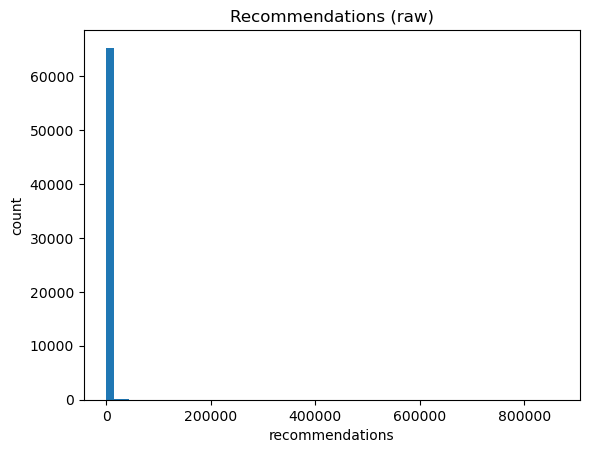

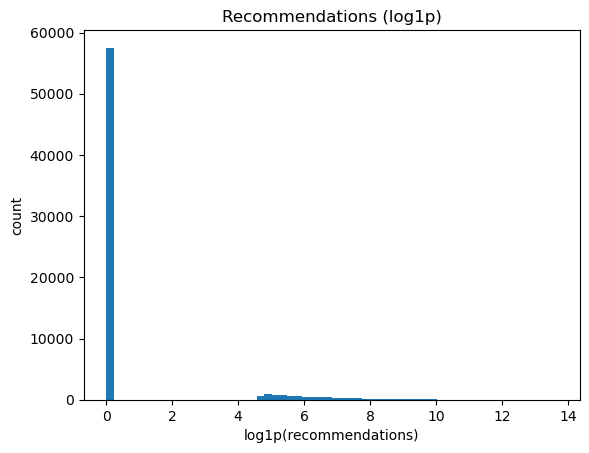

In [6]:
## Understanding distribution of target
rec = df["recommendations"]
    
plt.figure()
plt.hist(rec, bins=60)
plt.title("Recommendations (raw)")
plt.xlabel("recommendations")
plt.ylabel("count")
plt.show()

plt.figure()
plt.hist(np.log1p(rec), bins=60)
plt.title("Recommendations (log1p)")
plt.xlabel("log1p(recommendations)")
plt.ylabel("count")
plt.show()


### 2.3.1.2 Understanding distribution of features

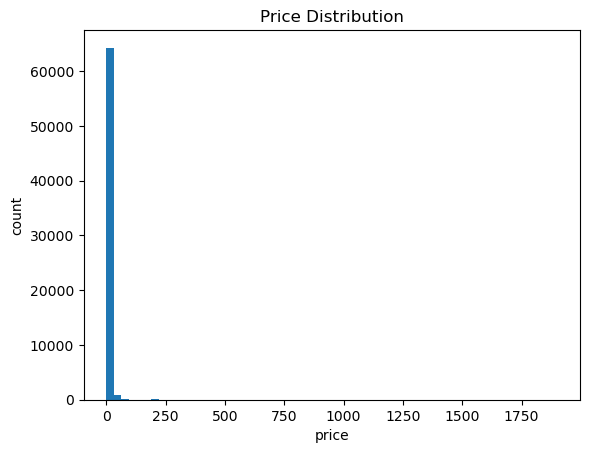

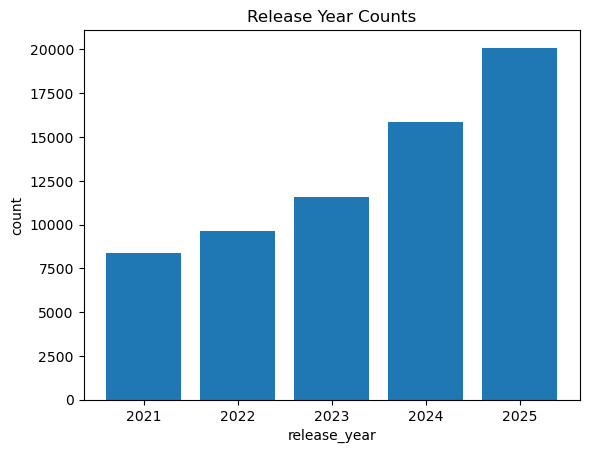

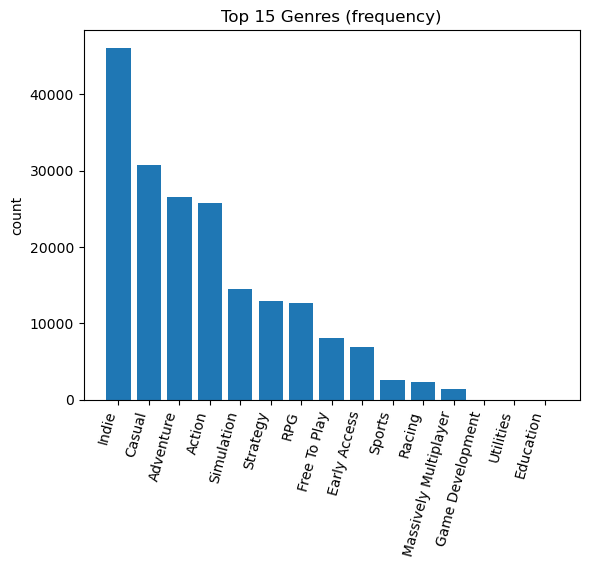

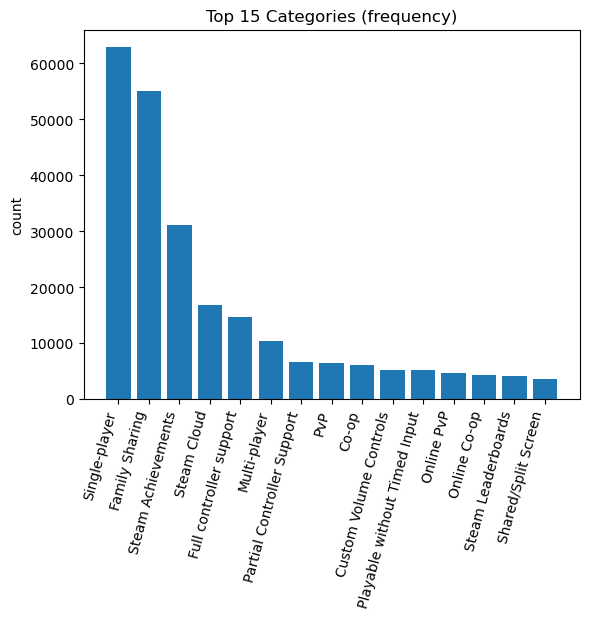

In [7]:
## Understanding distribution of features

# Price distribution
plt.figure()
plt.hist(df["price"], bins=60)
plt.title("Price Distribution")
plt.xlabel("price")
plt.ylabel("count")
plt.show()

# Release year distribution
year_counts = df["release_year"].value_counts().sort_index()
plt.figure()
plt.bar(year_counts.index.astype(str), year_counts.values)
plt.title("Release Year Counts")
plt.xlabel("release_year")
plt.ylabel("count")
plt.show()

# Top genres
genres_flat = df["genres"].fillna("").str.split(";").explode().str.strip()
genres_flat = genres_flat[genres_flat != ""]
top_genres = genres_flat.value_counts().head(15)

plt.figure()
plt.bar(top_genres.index, top_genres.values)
plt.title("Top 15 Genres (frequency)")
plt.xticks(rotation=75, ha="right")
plt.ylabel("count")
plt.show()

# Top categories
cats_flat = df["categories"].fillna("").str.split(";").explode().str.strip()
cats_flat = cats_flat[cats_flat != ""]
top_cats = cats_flat.value_counts().head(15)

plt.figure()
plt.bar(top_cats.index, top_cats.values)
plt.title("Top 15 Categories (frequency)")
plt.xticks(rotation=75, ha="right")
plt.ylabel("count")
plt.show()


### 2.3.2 Understanding relationship between variables

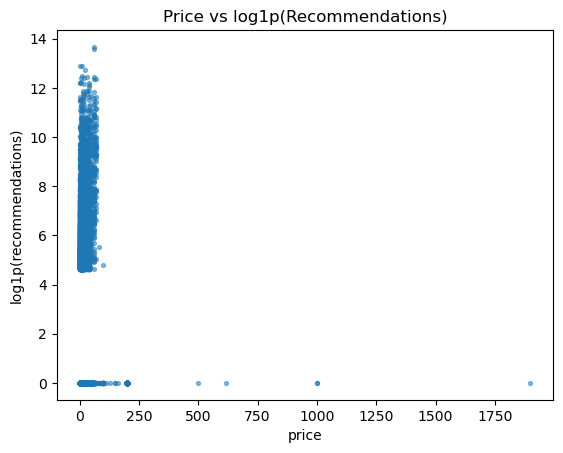

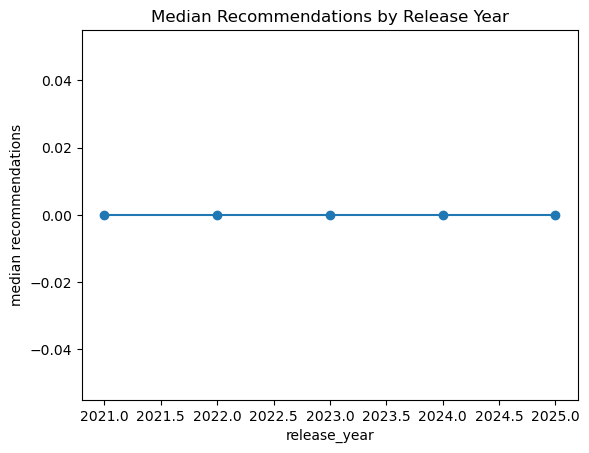

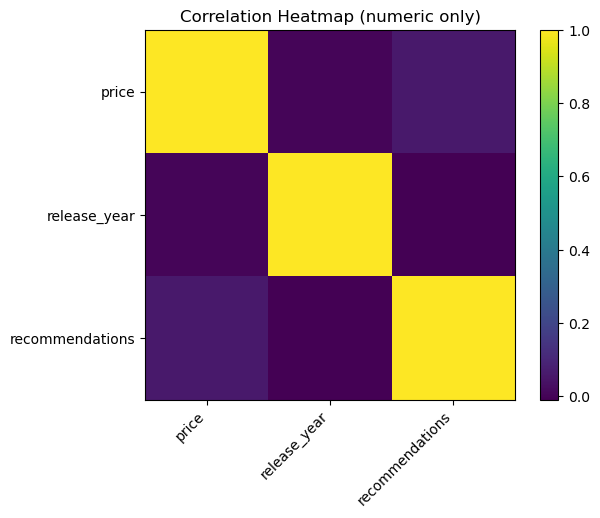

In [8]:
## Understanding relationship between variables

# Price vs log recommendations
plt.figure()
plt.scatter(df["price"], np.log1p(df["recommendations"]), s=8, alpha=0.5)
plt.title("Price vs log1p(Recommendations)")
plt.xlabel("price")
plt.ylabel("log1p(recommendations)")
plt.show()

# Median popularity by release_year
tmp = df.groupby("release_year")["recommendations"].median().sort_index()
plt.figure()
plt.plot(tmp.index, tmp.values, marker="o")
plt.title("Median Recommendations by Release Year")
plt.xlabel("release_year")
plt.ylabel("median recommendations")
plt.show()

# Numeric correlation
num_df = df[["price", "release_year", "recommendations"]].copy()
corr = num_df.corr(numeric_only=True)

plt.figure()
plt.imshow(corr.values)
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45, ha="right")
plt.yticks(range(len(corr.index)), corr.index)
plt.title("Correlation Heatmap (numeric only)")
plt.colorbar()
plt.show()


# 3. Data Preparation

## 3.1 Data Cleaning

In [9]:
## Clean data

## 3.2 Train-Test Split

In [10]:
## Split data into train set and test set


# 4. Modelling

### 4.2 Train Model

In [11]:
## Initialise and train model


# 5. Model Evaluation

In [12]:
## Evaluate model


In [13]:
## New data

## Predict


## Iterative model development


In [14]:
## Further feature engineering / feature selection